# Titanic Data
Jason Yeoh 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') 

## 1. Import dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 2. Data cleaning

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. EDA

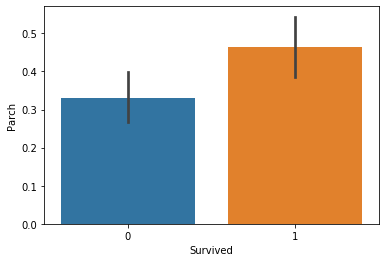

In [10]:
sns.barplot(train['Survived'], train['Parch'])

In [15]:
# Map embarked values
def mapEmbarked(x):
    if x=='S': 
        return 0
    elif x=='C':
        return 1
    else:
        return 0

train['Embarked'] = train['Embarked'].apply(lambda x: mapEmbarked(x))
test['Embarked'] = test['Embarked'].apply(lambda x: mapEmbarked(x))

In [16]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.001205
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.168240
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.243292
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.036261
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.059528
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.011069
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.269335
Embarked,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,1.000000


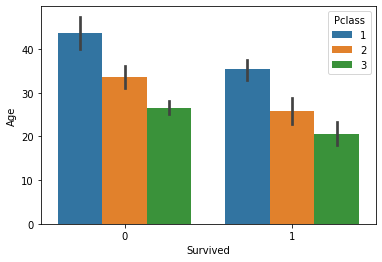

In [29]:
sns.barplot(train['Survived'], train['Age'], hue=train['Pclass'])

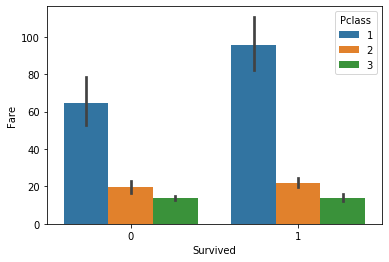

In [31]:
sns.barplot(train['Survived'], train['Fare'], hue=train['Pclass'])

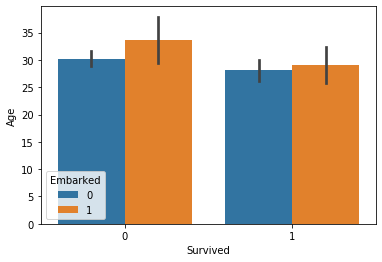

In [30]:
sns.barplot(train['Survived'], train['Age'], hue=train['Embarked'])

In [412]:
# Combine all family members size
train['Family_Size'] = train['SibSp'] + train['Parch']
test['Family_Size'] = test['SibSp'] + test['Parch']

In [413]:
# Impute missing values
train['Age'] = train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [414]:
# Map sex values
train['Sex'] = train['Sex'].apply(lambda x: 0 if x=='male' else 1)
test['Sex'] = test['Sex'].apply(lambda x: 0 if x=='male' else 1)

In [416]:
# train.isnull().sum()
train = train.drop(['Cabin', 'SibSp', 'Parch', 'Ticket', 'Name'], axis=1)
test = test.drop(['Cabin', 'SibSp', 'Parch', 'Ticket', 'Name'], axis=1)

In [417]:
def mapAge(x):
    if x <= 11:
        return 0
    elif x > 11 and x <= 18:
        return 1
    elif x > 18 and x <= 22:
        return 2
    elif x > 22 and x <= 27:
        return 3
    elif x > 27 and x <= 33:
        return 4
    elif x > 33 and x <= 40:
        return 5
    elif x > 40 and x <= 66:
        return 6
    else:
        return 7
    
train['Age_Range'] = train['Age'].apply(lambda x: mapAge(x))
test['Age_Range'] = test['Age'].apply(lambda x: mapAge(x))

In [418]:
# train[train['Fare'] <= 14.4542]['Survived'].value_counts()
Q1_Fare = np.quantile(train['Fare'], 0.2)
Q2_Fare = np.quantile(train['Fare'], 0.4)
Q3_Fare = np.quantile(train['Fare'], 0.6)
Q4_Fare = np.quantile(train['Fare'], 0.8)

def mapFare(x):
    if x < Q1_Fare:
        return 0
    elif x > Q1_Fare and x <= Q2_Fare:
        return 1
    elif x > Q2_Fare and x <= Q3_Fare:
        return 2
    elif x > Q3_Fare and x <= Q4_Fare:
        return 3
    else:
        return 4
    
train['Fare_Range'] = train['Fare'].apply(lambda x: mapFare(x))
test['Fare_Range'] = test['Fare'].apply(lambda x: mapFare(x))

In [419]:
train = train.drop(['Fare', 'Age'], axis=1)
test = test.drop(['Fare', 'Age'], axis=1)

## Training model

In [420]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [421]:
y_train = train['Survived']
X_train = train.drop(['Survived', 'PassengerId'], axis=1)

In [422]:
#SVM
clf = SVC()
np.mean(cross_val_score(clf, X_train, y_train, cv=KFold(n_splits=10, shuffle=True), n_jobs=1, scoring='accuracy'))

0.8271785268414481

In [423]:
clf = RandomForestClassifier(n_estimators=100)
np.mean(cross_val_score(clf, X_train, y_train, cv=KFold(n_splits=10, shuffle=True), n_jobs=1, scoring='accuracy'))

0.7979151061173533

In [424]:
clf = KNeighborsClassifier(n_neighbors=5)
np.mean(cross_val_score(clf, X_train, y_train, cv=KFold(n_splits=10, shuffle=True), n_jobs=1, scoring='accuracy'))

0.7867415730337078

In [425]:
clf = LogisticRegression()
np.mean(cross_val_score(clf, X_train, y_train, cv=KFold(n_splits=10, shuffle=True), n_jobs=1, scoring='accuracy'))

0.7957303370786517

In [426]:
clf = GaussianNB()
np.mean(cross_val_score(clf, X_train, y_train, cv=KFold(n_splits=10, shuffle=True), n_jobs=1, scoring='accuracy'))

0.7687765293383271

In [427]:
clf = DecisionTreeClassifier()
np.mean(cross_val_score(clf, X_train, y_train, cv=KFold(n_splits=10, shuffle=True), n_jobs=1, scoring='accuracy'))

0.7777028714107366

## Prediction

In [428]:
clf = SVC()
clf.fit(X_train, y_train)

passengerId = test['PassengerId']
X_test = test.drop('PassengerId', axis=1)

survived = clf.predict(X_test)

In [429]:
submission = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': survived
})
submission.to_csv('submission.csv', index=False)

# submission = pd.read_csv('submission.csv')
